In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from utilitaires import  find_permutation

In [31]:
#Générer les données

dataset = make_blobs(n_samples=500,
                     centers=3,
                     n_features=2,
                     cluster_std=0.7,
                     random_state=1
                     )


In [32]:
# variables explicatives (p=2)
data = dataset[0]
#labels
target = dataset[1]

In [33]:
data

array([[-10.09794953,  -3.2302599 ],
       [-10.59373146,  -3.25273155],
       [ -7.62920693,  -8.11888492],
       [ -0.1260701 ,   3.07903722],
       [ -6.316592  ,  -8.30005516],
       [ -0.32629881,   5.18422956],
       [ -9.56512263,  -4.08227198],
       [ -7.16242845,  -8.66320435],
       [ -9.7805219 ,  -5.41932202],
       [ -6.76673806,  -8.11887183],
       [ -6.41300321,  -7.48836193],
       [ -6.28885045,  -8.64527239],
       [ -7.19826599,  -7.98989072],
       [ -0.8659213 ,   3.63656598],
       [-10.07470655,  -3.94736429],
       [ -7.22361432,  -9.2483836 ],
       [ -1.4031275 ,   3.6752773 ],
       [ -7.2527421 ,  -8.24540104],
       [ -0.63608435,   2.96439137],
       [ -6.94961664,  -7.60850618],
       [-10.94114796,  -2.92383065],
       [ -7.17023521,  -7.51237862],
       [ -9.62749668,  -5.51930911],
       [ -1.79384479,   3.78514959],
       [ -6.49484199,  -7.60689915],
       [ -7.72878994,  -8.44966291],
       [ -1.52896693,   4.69352602],
 

In [34]:
target

array([1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2,
       1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2,
       2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0,
       1, 2, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2,
       1, 2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2,
       0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1,
       1, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2,
       2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       2, 2, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0,
       2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 1, 1,

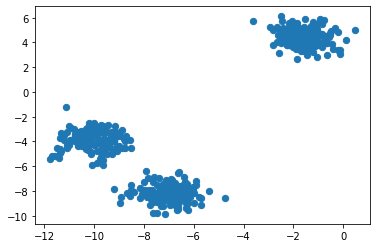

In [35]:
#Affichage des données
plt.scatter(data[:,0],data[:,1], s=40)
plt.show()

In [36]:
#Créer un modèle kmeans
model = KMeans(n_clusters=3)
#Ajuster le modèle aux données
model.fit(data)
#prediction
y_kmeans = model.predict(data) # même chose que model.labels_
model.labels_ #les labels prédits
model.cluster_centers_ # centroides
model.inertia_ #inertie
model.score(data) #-inertie

-470.7728471429774

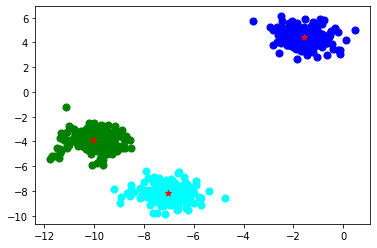

In [37]:

###### PROBLEME LES LABELS SONT PERMUTES  on va vérifier çà avec les graphiques
# et le score
# Representation graphique 1
plt.scatter(data[model.labels_==0][:,0],
            data[model.labels_==0][:,1],s=50,color ='BLUE')
plt.scatter(data[model.labels_==1][:,0],
            data[model.labels_==1][:,1],s=50,color ='GREEN')
plt.scatter(data[model.labels_==2][:,0],
            data[model.labels_==2][:,1],s=50,color ='CYAN')
plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],c='r',marker='*')
plt.show()

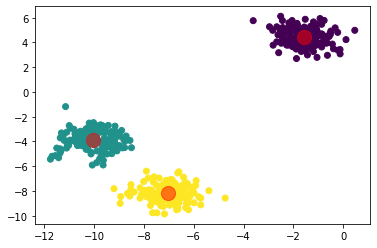

In [38]:
# Representation graphique  faite d'une autre manière
plt.scatter(data[:,0],data[:,1],c=model.labels_)
plt.scatter(model.cluster_centers_[:, 0],
            model.cluster_centers_[:, 1], c='RED', s=200, alpha=0.5)

In [39]:
#EVALUATION  
sm.accuracy_score(target, model.labels_, normalize=True)
#conclusion  : score peut être faible puisque les labels  des classes 
#peuvent être  permutés

1.0

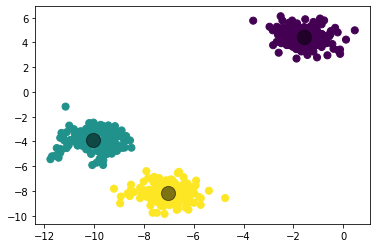

In [40]:
# RESOLUTION DU PROBLEME

# Representation graphique 2
permutation = find_permutation(3, target, model.labels_)
new_labels = [permutation[label] for label in model.labels_]

plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [41]:
#EVALUATION
sm.accuracy_score(target, new_labels, normalize=True)

1.0

In [42]:
sm.silhouette_score(data, model.labels_)

0.8096734884981345

Text(0, 0.5, 'Cout du modele (inertia)')

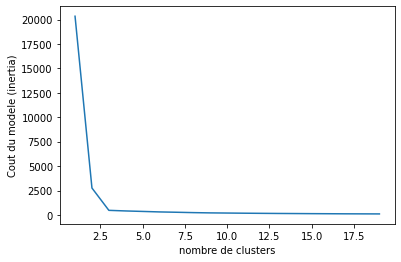

In [46]:
# extraire les données des clusters
data[model.labels_ == 0] # premier cluster 
data[model.labels_ == 1] # Second cluster 
data[model.labels_ == 2] #troisieme cluster
#Choix du K
#ELBOW METHOD : Détecter une zone de coude dans la minimisation
# du Coût (inertia_)
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters = k).fit(data)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (inertia)')
